<a href="https://colab.research.google.com/github/BHARGAVIGHEGDE/OIBSIP/blob/main/OIBSIP_car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES


In [ ]:
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import string


LOADING DATASETS

In [56]:
data=pd.read_csv("car data.csv")
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
data.shape

(301, 9)

In [57]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


ANALYSING THE DATA


In [ ]:
#analysing the total types of fuels used
print(data.Fuel_Type.value_counts())

#analysing the seller type
print(data.Seller_Type.value_counts())

#analysing the trasmission type
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


ENCODING TO CATEGORIAL DATA


In [59]:
#encoding for Fuel_Type column
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

#encoding for Seller_Type column
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

#encoding for Transmission column
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [60]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


SPLITTING THE DATA INTO TEST DATA AND TRAIN DATA

In [61]:
X=data.drop(['Car_Name','Selling_Price'],axis=1)
Y=data['Selling_Price']


In [62]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [63]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)


MODEL TRAINING


1.LINEAR REGRESSION

In [65]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, Y_train)


LinearRegression()

In [69]:
#prediction on training data
training_data_prediction=linearRegression.predict(X_train)



In [70]:
#R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is",error_score)

R squared error is 0.8791183112121745


VISUALIZE THE ACTUAL PRICE AND THE PREDICTED PRICE

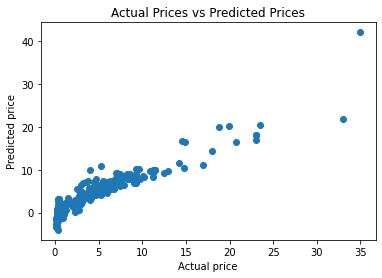

In [71]:
mp.scatter(Y_train,training_data_prediction)
mp.xlabel("Actual price")
mp.ylabel("Predicted price")
mp.title("Actual Prices vs Predicted Prices")
mp.show()

In [76]:
#prediction on testing data
testing_data_prediction=linearRegression.predict(X_test)



In [77]:
#R squared Error
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error is",error_score)

R squared error is 0.8665824758685367


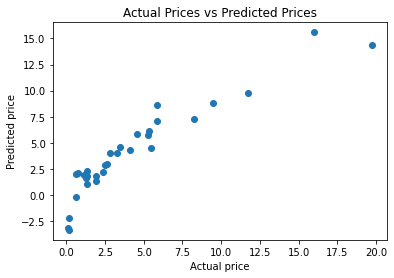

In [78]:
mp.scatter(Y_test,testing_data_prediction)
mp.xlabel("Actual price")
mp.ylabel("Predicted price")
mp.title("Actual Prices vs Predicted Prices")
mp.show()

2.LASSO REGRESSION 

In [79]:
lasoRegression =Lasso()
lasoRegression.fit(X_train, Y_train)


Lasso()

In [80]:
#prediction on training data
training_data_prediction=lasoRegression.predict(X_train)



In [81]:
#R squared Error
error_score=metrics.r2_score(Y_train,training_data_prediction)
print("R squared error is",error_score)

R squared error is 0.8433776135605382


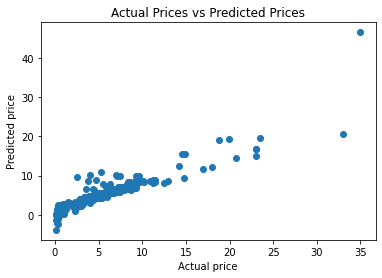

In [82]:
mp.scatter(Y_train,training_data_prediction)
mp.xlabel("Actual price")
mp.ylabel("Predicted price")
mp.title("Actual Prices vs Predicted Prices")
mp.show()

In [83]:
#prediction on testing data
testing_data_prediction=lasoRegression.predict(X_test)


In [84]:
#R squared Error
error_score=metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error is",error_score)

R squared error is 0.8552634772657525


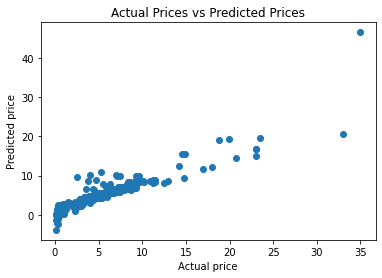

In [85]:
mp.scatter(Y_train,training_data_prediction)
mp.xlabel("Actual price")
mp.ylabel("Predicted price")
mp.title("Actual Prices vs Predicted Prices")
mp.show()